<a href="https://colab.research.google.com/github/Yutthana-BJ/Data_Analytics_Projects/blob/main/FP_I_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm
from google.colab import drive
drive.mount('/content/drive')
Solar_Consumption_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Solar_Consumption_W1.xlsx'
Solar_Consumption_F1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Solar_Consumption_F1.xlsx'
Environment_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Environment_W1.xlsx'
Environment_F1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Environment_F1.xlsx'
Peak_Calendar = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Peak_Calendar.xlsx'

Mounted at /content/drive


# **Warehouse: W1**

In [2]:
df_E_W1 = pd.read_excel(Environment_W1)
df_E_W1['Plant'] = df_E_W1['Device'].str[:12]
df_E_W1['Device'] = df_E_W1['Device'].str[13:]
df_E_W1 = df_E_W1[['Plant'] + [col for col in df_E_W1.columns if col != 'Plant']]
df_E_W1.head(5)

,Plant,Datetime,Device,Area,Humidity,Temperature
0,warehouse_w1,2022-04-01 00:00:00,ambient_f1,Inside,74.5,30.7
1,warehouse_w1,2022-04-01 00:10:00,ambient_f1,Inside,74.5,30.8
2,warehouse_w1,2022-04-01 00:15:00,ambient_f1,Inside,74.5,30.8
3,warehouse_w1,2022-04-01 00:20:00,ambient_f1,Inside,75.0,30.8
4,warehouse_w1,2022-04-01 00:30:00,ambient_f1,Inside,75.0,30.8


In [3]:
dfs = []

grouped_dfs = {device: data for device, data in df_E_W1.groupby('Device')}
for device, data in grouped_dfs.items():
    globals()[f"df_E_W1_{device}"] = data
    grouped = data.groupby(pd.Grouper(key='Datetime', freq='H'))
    df = grouped.agg({'Plant': ['first'], 'Device': ['first'], 'Area': ['first'], 'Humidity': ['mean'], 'Temperature': ['mean']})
    df.columns = ['Plant', 'Device', 'Area', 'Humidity_mean', 'Temperature_mean']
    df.reset_index(inplace=True)
    dfs.append(df)

df_E_W1 = pd.concat(dfs, ignore_index=True)
df_E_W1['Date'] = pd.to_datetime(df_E_W1['Datetime'].dt.date)
df_E_W1['Time'] = df_E_W1['Datetime'].dt.time
df_E_W1 = df_E_W1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          17472 non-null  datetime64[ns]
 1   Plant             17208 non-null  object        
 2   Device            17208 non-null  object        
 3   Area              17208 non-null  object        
 4   Humidity_mean     17208 non-null  float64       
 5   Temperature_mean  17208 non-null  float64       
 6   Date              17472 non-null  datetime64[ns]
 7   Time              17472 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 1.1+ MB


In [4]:
#device_error = df_E_W1[df_E_W1.isnull().any(axis=1)]
#device_error = device_error[['Date', 'Time']].value_counts().sort_index().reset_index()
#device_error

In [5]:
device_type = df_E_W1[df_E_W1['Device'].notnull()]['Device'].unique().tolist()

def update_device(row):
    if pd.isna(row['Device']):
        return device_type[row.name % len(device_type)]
    else:
        return row['Device']

def update_area_W1(row):
    if row['Device'] in ['ambient_f1', 'ambient_f2', 'ambient_f3', 'pillar_2m', 'pillar_4m', 'pillar_6m', 'pillar_12m']:
        return 'Inside'
    elif row['Device'] in ['outdoor']:
        return 'Outside'
    else:
        return row['Area']

df_E_W1['Plant'] = 'Warehouse W1'
df_E_W1['Device'] = df_E_W1.apply(update_device, axis=1)
df_E_W1['Area'] = df_E_W1.apply(update_area_W1, axis=1)
df_E_W1['Humidity_mean'] = df_E_W1.groupby(['Device', 'Time'])['Humidity_mean'].transform(lambda x: x.fillna(x.median()))
df_E_W1['Temperature_mean'] = df_E_W1.groupby(['Device', 'Time'])['Temperature_mean'].transform(lambda x: x.fillna(x.median()))
df_E_W1 = df_E_W1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          17472 non-null  datetime64[ns]
 1   Plant             17472 non-null  object        
 2   Device            17472 non-null  object        
 3   Area              17472 non-null  object        
 4   Humidity_mean     17472 non-null  float64       
 5   Temperature_mean  17472 non-null  float64       
 6   Date              17472 non-null  datetime64[ns]
 7   Time              17472 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 1.1+ MB


<ipython-input-6-e73b71b87114>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-6-e73b71b87114>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-6-e73b71b87114>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-6-e73b71b87114>:11: UserWarning: The palette list has more values (17472) than needed (24), which may not be intended.
 

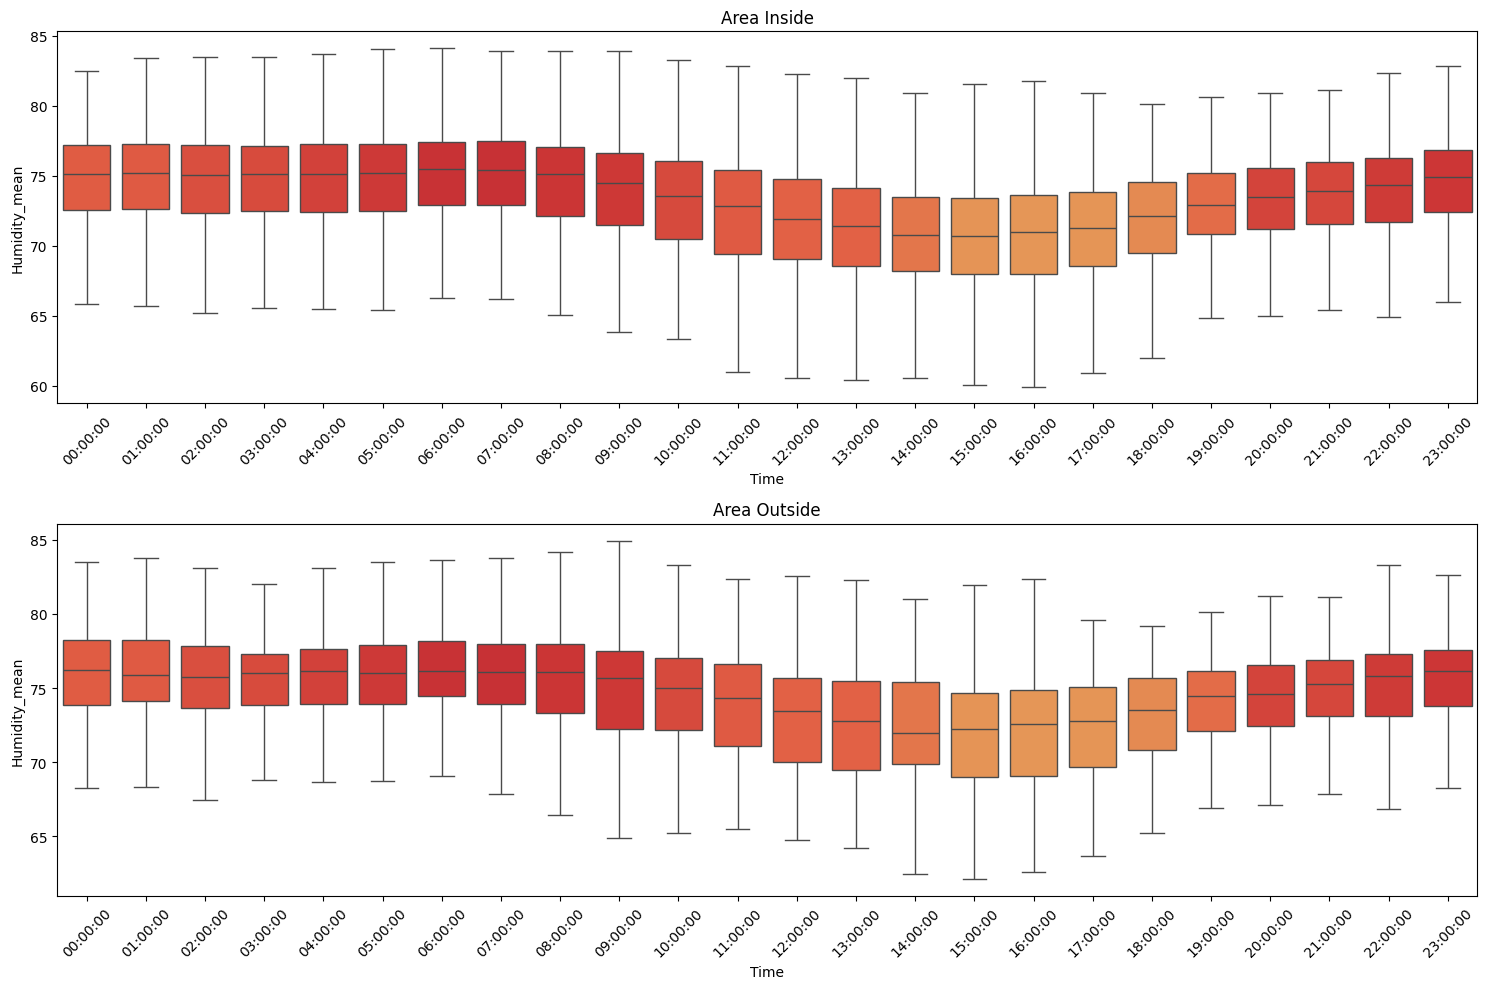

In [6]:
norm = Normalize(vmin=df_E_W1['Humidity_mean'].min(), vmax=df_E_W1['Humidity_mean'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_E_W1['Humidity_mean']))

grouped = df_E_W1.groupby('Area')

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

for i, (area, group) in enumerate(grouped):
    ax = axs[i]
    sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
    ax.set_title(f'Area {area}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Humidity_mean')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-7-1b1b80dd7484>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-7-1b1b80dd7484>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-7-1b1b80dd7484>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-7-1b1b80dd7484>:11: UserWarning: The palette list has more values (17472) than needed (24), which may not be inten

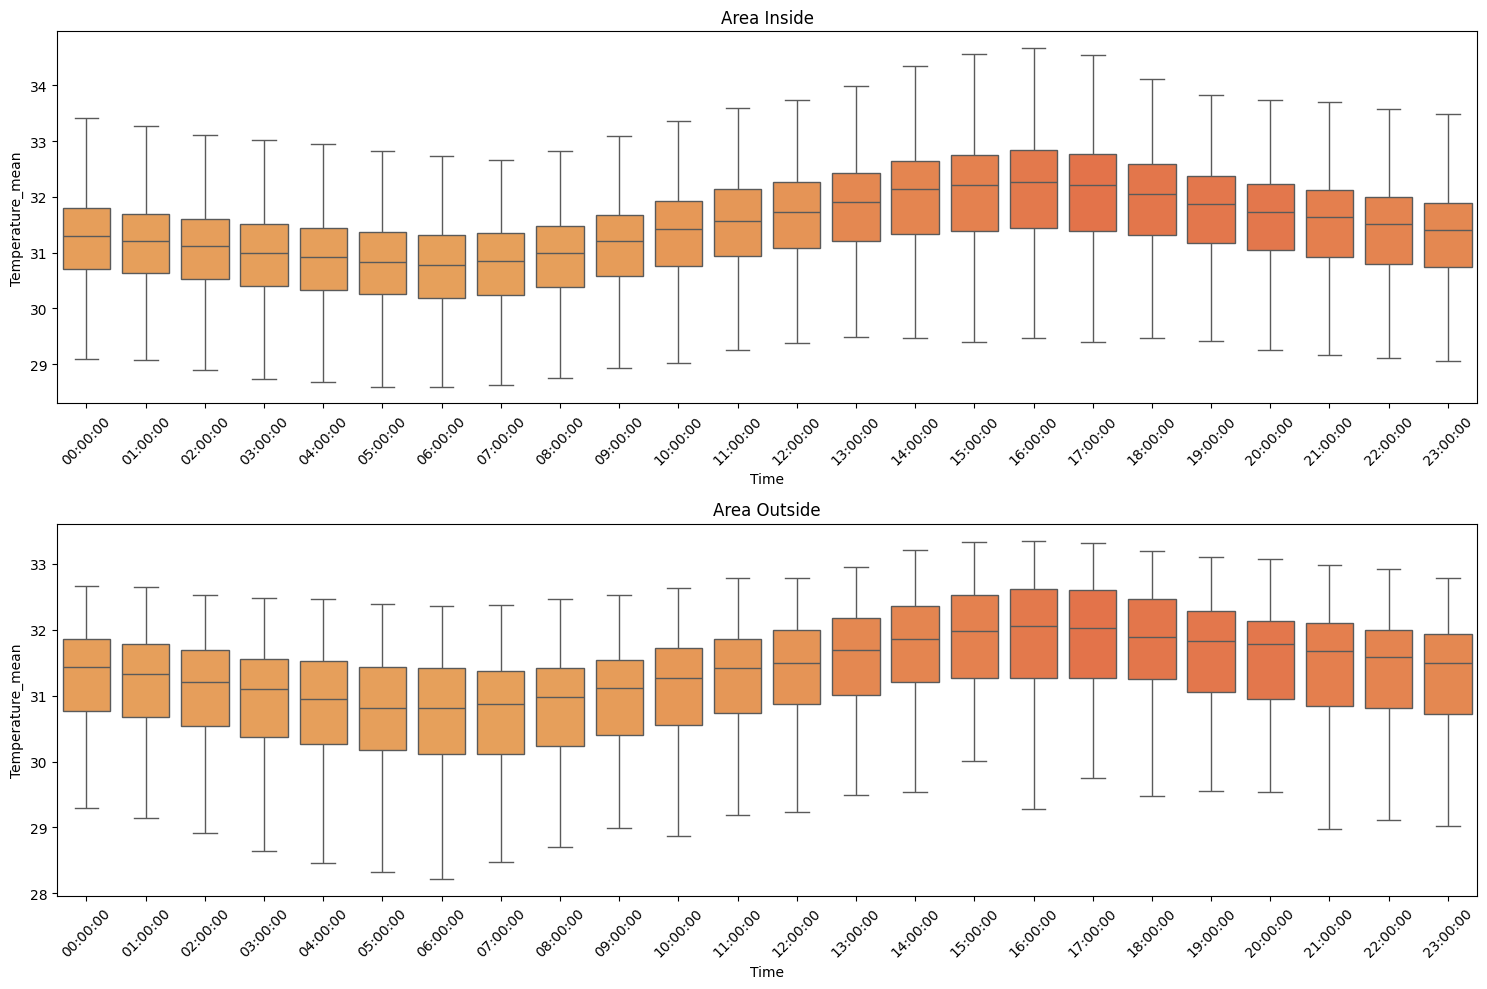

In [7]:
norm = Normalize(vmin=df_E_W1['Temperature_mean'].min(), vmax=df_E_W1['Temperature_mean'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_E_W1['Temperature_mean']))

grouped = df_E_W1.groupby('Area')

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

for i, (area, group) in enumerate(grouped):
    ax = axs[i]
    sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
    ax.set_title(f'Area {area}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature_mean')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

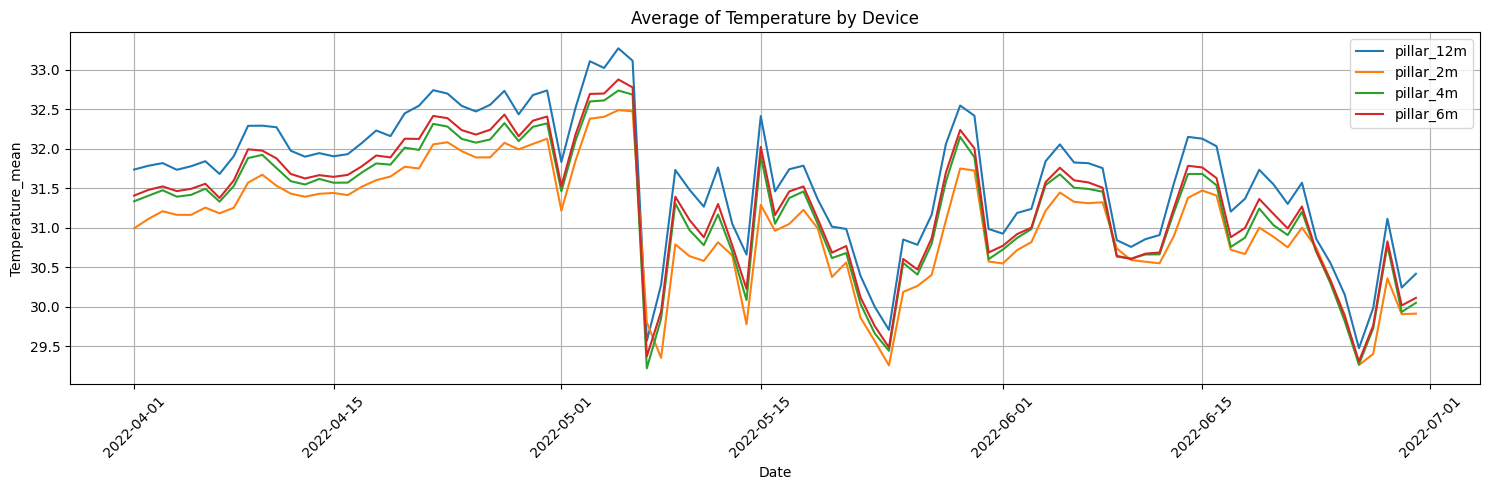

In [8]:
grouped = df_E_W1[df_E_W1['Device'].isin(['pillar_2m', 'pillar_4m', 'pillar_6m', 'pillar_12m'])]
grouped = grouped.groupby(['Device', 'Date'])['Temperature_mean'].mean()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for device in grouped['Device'].unique():
    device_data = grouped[grouped['Device'] == device]
    ax.plot(device_data['Date'], device_data['Temperature_mean'], label=device)

plt.title('Average of Temperature by Device')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature_mean')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

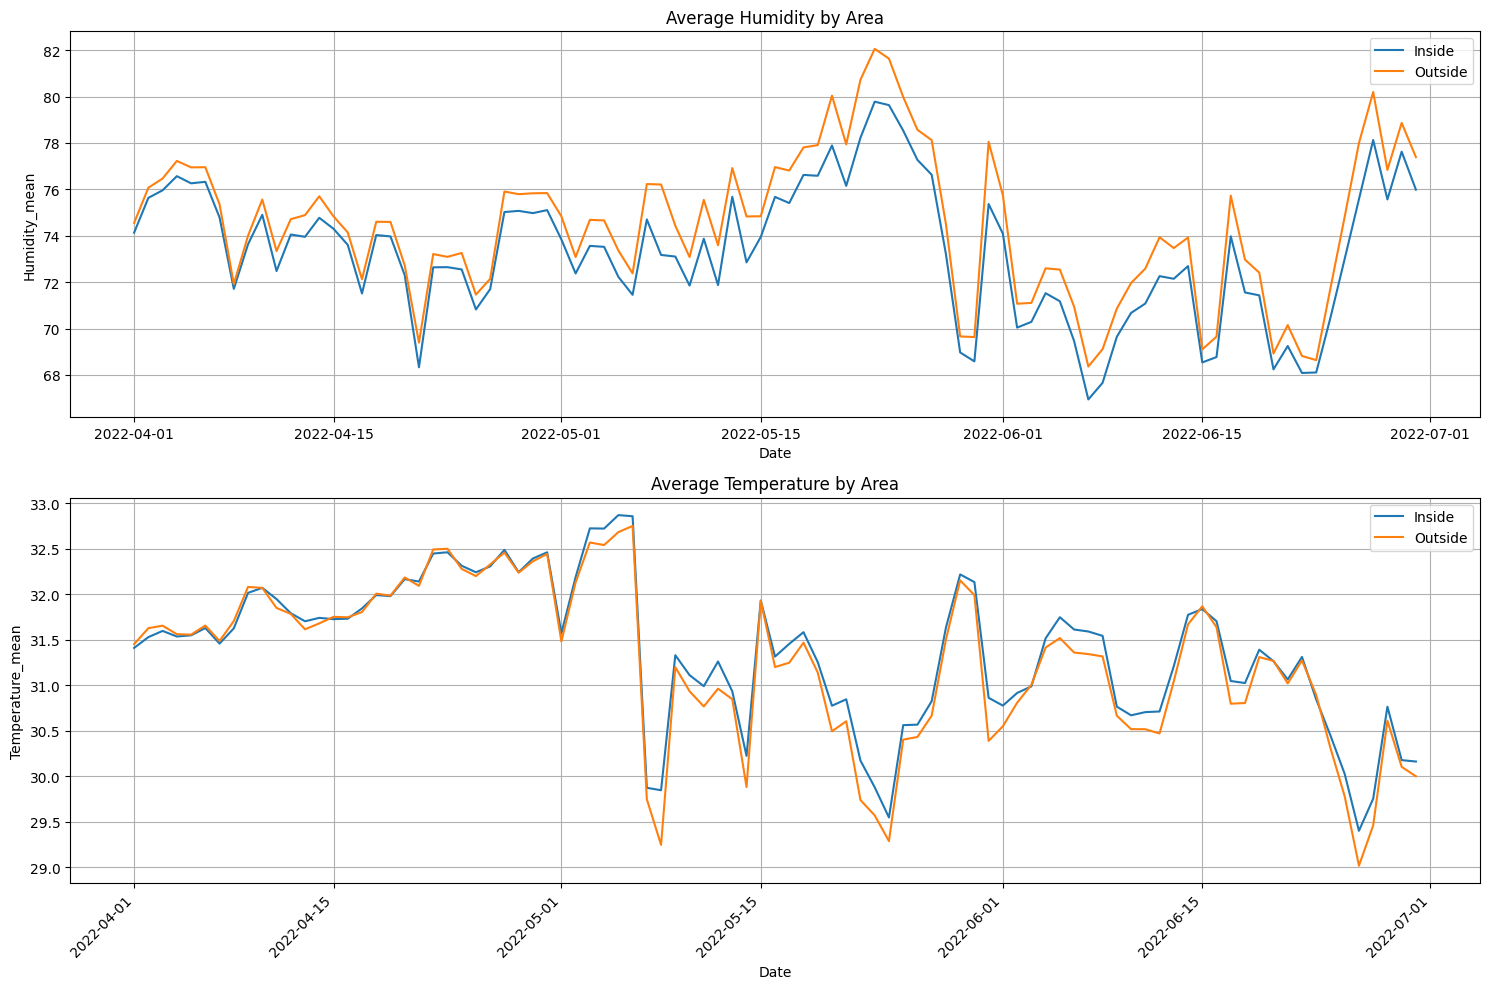

In [9]:
grouped = df_E_W1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], label=area)

ax1.set_title('Average Humidity by Area')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity_mean')
ax1.legend()
ax1.grid(True)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], label=area)

ax2.set_title('Average Temperature by Area')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature_mean')
ax2.legend()
ax2.grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
#
df_E_W1_Outside = df_E_W1[df_E_W1['Area'] == 'Outside']
df_E_W1_Outside = df_E_W1_Outside[['Datetime', 'Humidity_mean', 'Temperature_mean']].reset_index(drop=True)

#
df_SC_W1 = pd.read_excel(Solar_Consumption_W1)
df_SC_W1 = pd.merge(df_SC_W1, df_E_W1_Outside, on='Datetime', how='outer')
df_SC_W1['Date'] = pd.to_datetime(df_SC_W1['Datetime'].dt.date)
df_SC_W1['Time'] = df_SC_W1['Datetime'].dt.time

#
df_SC_W1.info()
df_SC_W1[df_SC_W1.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2182 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2163 non-null   float64       
 3   Inverter Yield      1424 non-null   float64       
 4   Export Energy       2163 non-null   float64       
 5   Self Consumption    2163 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


,Plant,Datetime,Global Irradiation,Inverter Yield,Export Energy,Self Consumption,Humidity_mean,Temperature_mean,Date,Time
1,Warehouse W1,2022-04-01 01:00:00,0.0,NaN,0.0,0.0,74.857143,30.971429,2022-04-01,01:00:00
2,Warehouse W1,2022-04-01 02:00:00,0.0,NaN,0.0,0.0,75.777778,30.933333,2022-04-01,02:00:00
3,Warehouse W1,2022-04-01 03:00:00,0.0,NaN,0.0,0.0,76.437500,30.900000,2022-04-01,03:00:00
4,Warehouse W1,2022-04-01 04:00:00,0.0,NaN,0.0,0.0,77.500000,30.862500,2022-04-01,04:00:00
19,Warehouse W1,2022-04-01 19:00:00,0.0,NaN,0.0,0.0,72.937500,32.037500,2022-04-01,19:00:00
...,...,...,...,...,...,...,...,...,...,...
2179,Warehouse W1,2022-06-30 21:00:00,0.0,NaN,0.0,0.0,76.111111,29.288889,2022-06-30,21:00:00
2180,Warehouse W1,2022-06-30 22:00:00,0.0,NaN,0.0,0.0,77.285714,29.271429,2022-06-30,22:00:00
2181,Warehouse W1,2022-06-30 23:00:00,0.0,NaN,0.0,0.0,78.142857,29.342857,2022-06-30,23:00:00
2182,NaN,2022-06-04 23:00:00,NaN,NaN,NaN,NaN,78.428571,31.714286,2022-06-04,23:00:00


In [11]:
#
def GlobalIrradiation_MissingValue(row):
    if pd.isna(row['Global Irradiation']) and row['Inverter Yield'] == 0:
      return 0
    else:
        return row['Global Irradiation']

#
def InverterYield_MissingValue(row):
    if pd.isna(row['Inverter Yield']) and row['Global Irradiation'] == 0:
        return 0
    elif pd.isna(row['Inverter Yield']) and row['Global Irradiation'] != 0:
        return row['Global Irradiation']
    else:
        return row['Inverter Yield']

#
def SelfConsumption_MissingValue(row):
    if pd.isna(row['Self Consumption']) and row['Global Irradiation'] == 0:
        return 0
    else:
        return row['Self Consumption']

#
def ExportEnergy_MissingValue(row):
    if pd.isna(row['Export Energy']):
        return row['Inverter Yield'] - row['Self Consumption']
    else:
        return row['Export Energy']

In [12]:
#
df_SC_W1['Plant'] = 'Warehouse W1'
df_SC_W1['Global Irradiation'] = df_SC_W1.apply(GlobalIrradiation_MissingValue, axis=1)
df_SC_W1['Inverter Yield'] = df_SC_W1.apply(InverterYield_MissingValue, axis=1)
df_SC_W1['Self Consumption'] = df_SC_W1.apply(SelfConsumption_MissingValue, axis=1)
df_SC_W1['Global Irradiation'] = df_SC_W1.groupby('Time')['Global Irradiation'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Inverter Yield'] = df_SC_W1.groupby('Time')['Inverter Yield'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Self Consumption'] = df_SC_W1.groupby('Time')['Self Consumption'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Export Energy'] = df_SC_W1.apply(ExportEnergy_MissingValue, axis=1)
df_SC_W1 = df_SC_W1.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2184 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2184 non-null   float64       
 3   Inverter Yield      2184 non-null   float64       
 4   Export Energy       2184 non-null   float64       
 5   Self Consumption    2184 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


<ipython-input-13-1f3193041a84>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-13-1f3193041a84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-13-1f3193041a84>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-13-1f3193041a84>:6: UserWarning: The palette list has more values (2184) than needed (24), which may not be intended.

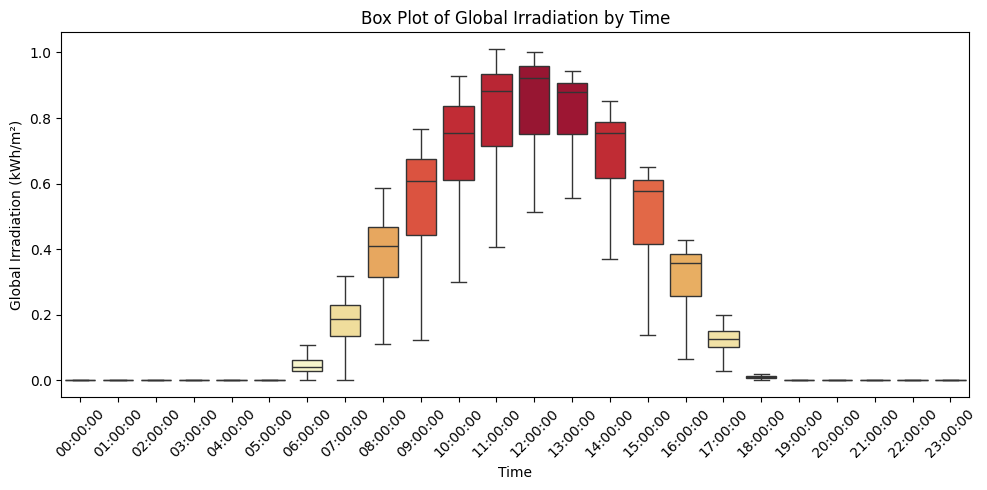

In [13]:
norm = Normalize(vmin=df_SC_W1['Global Irradiation'].min(), vmax=df_SC_W1['Global Irradiation'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_SC_W1['Global Irradiation']))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
plt.title('Box Plot of Global Irradiation by Time')
plt.xlabel('Time')
plt.ylabel('Global Irradiation (kWh/m²)')
plt.xticks(rotation=45)
plt.tight_layout()

# **Factory: F1**

In [14]:
#
df_E_F1 = pd.read_excel(Environment_F1)
df_E_F1['Plant'] = df_E_F1['Device'].str[:10]
df_E_F1['Device'] = df_E_F1['Device'].str[11:]
df_E_F1 = df_E_F1[['Plant'] + [col for col in df_E_F1.columns if col != 'Plant']]

#
dfs = []
grouped_dfs = {device: data for device, data in df_E_F1.groupby('Device')}
for device, data in grouped_dfs.items():
    globals()[f"df_E_F1_{device}"] = data
    grouped = data.groupby(pd.Grouper(key='Datetime', freq='H'))
    df = grouped.agg({'Plant': ['first'], 'Device': ['first'], 'Area': ['first'], 'Humidity': ['mean'], 'Temperature': ['mean']})
    df.columns = ['Plant', 'Device', 'Area', 'Humidity_mean', 'Temperature_mean']
    df.reset_index(inplace=True)
    dfs.append(df)

#
df_E_F1 = pd.concat(dfs, ignore_index=True)
df_E_F1['Date'] = pd.to_datetime(df_E_F1['Datetime'].dt.date)
df_E_F1['Time'] = df_E_F1['Datetime'].dt.time
df_E_F1 = df_E_F1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          10920 non-null  datetime64[ns]
 1   Plant             10750 non-null  object        
 2   Device            10750 non-null  object        
 3   Area              10750 non-null  object        
 4   Humidity_mean     10750 non-null  float64       
 5   Temperature_mean  10750 non-null  float64       
 6   Date              10920 non-null  datetime64[ns]
 7   Time              10920 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 682.6+ KB


In [15]:
#device_error = df_E_F1[df_E_F1.isnull().any(axis=1)]
#device_error = device_error[['Date', 'Time']].value_counts().sort_index().reset_index()
#device_error

In [16]:
#df_E_F1[['Area', 'Device']].value_counts().sort_index().reset_index()

In [17]:
#
device_type_1 = ['outdoor', 'roof', 'ambient', 'prod', 'dry']
device_type_2 = ['ambient', 'prod', 'dry']
device_type_3 = ['prod', 'dry']

#
def update_device_1(row):
    if row['Datetime'].date() in [pd.to_datetime('2022-05-01').date(), pd.to_datetime('2022-05-02').date()] and pd.isna(row['Device']):
        return device_type_1[row.name % len(device_type_1)]
    else:
        return row['Device']

#
def update_device_2(row):
    if row['Datetime'].date() in [pd.to_datetime('2022-06-02 10:00:00').date()] and pd.isna(row['Device']):
        return device_type_2[row.name % len(device_type_2)]
    elif row['Datetime'].date() in [pd.to_datetime('2022-06-02 11:00:00').date()] and pd.isna(row['Device']):
        return device_type_3[row.name % len(device_type_3)]
    else:
        return row['Device']

#
def update_area_F1(row):
    if row['Device'] in ['ambient', 'prod']:
        return 'Inside'
    elif row['Device'] in ['roof', 'outdoor']:
        return 'Outside'
    elif row['Device'] == 'dry':
        return 'Dry Room'
    else:
        return row['Area']

#
df_E_F1['Plant'] = 'Factory F1'
df_E_F1['Device'] = df_E_F1.apply(update_device_1, axis=1)
df_E_F1['Device'] = df_E_F1.apply(update_device_2, axis=1)
df_E_F1['Area'] = df_E_F1.apply(update_area_F1, axis=1)
df_E_F1['Humidity_mean'] = df_E_F1.groupby(['Device', 'Time'])['Humidity_mean'].transform(lambda x: x.fillna(x.median()))
df_E_F1['Temperature_mean'] = df_E_F1.groupby(['Device', 'Time'])['Temperature_mean'].transform(lambda x: x.fillna(x.median()))
df_E_F1 = df_E_F1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          10920 non-null  datetime64[ns]
 1   Plant             10920 non-null  object        
 2   Device            10920 non-null  object        
 3   Area              10920 non-null  object        
 4   Humidity_mean     10920 non-null  float64       
 5   Temperature_mean  10920 non-null  float64       
 6   Date              10920 non-null  datetime64[ns]
 7   Time              10920 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 682.6+ KB


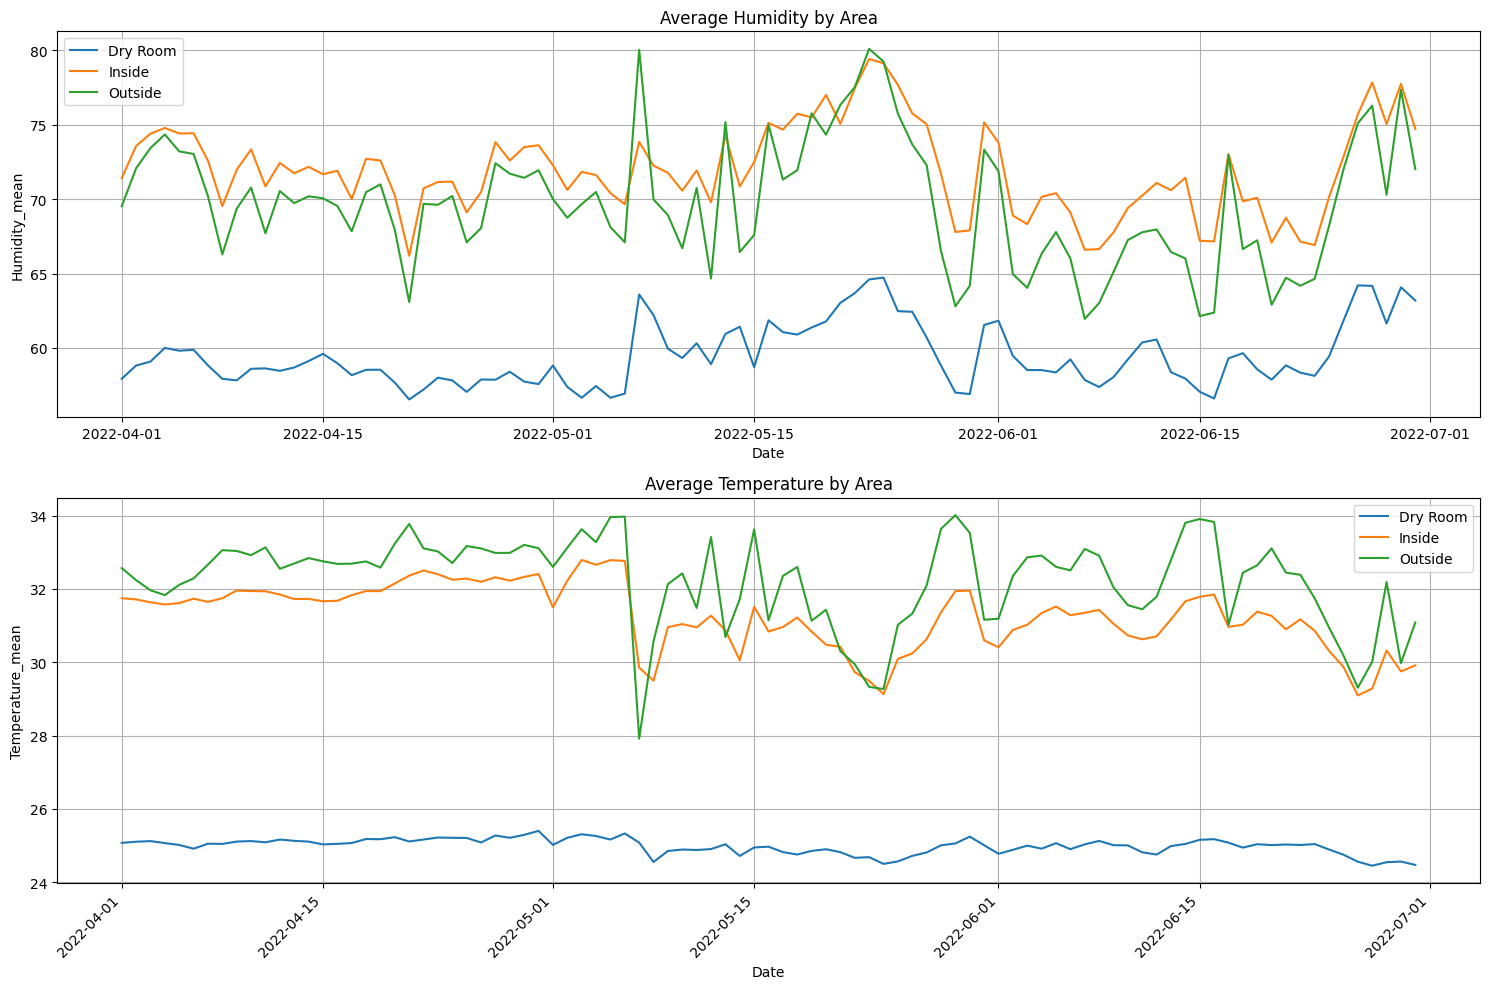

In [18]:
#grouped = df_E_F1[df_E_F1['Area'] == 'Dry Room']
#grouped = grouped.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = df_E_F1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], label=area)

ax1.set_title('Average Humidity by Area')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity_mean')
ax1.legend()
ax1.grid(True)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], label=area)

ax2.set_title('Average Temperature by Area')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature_mean')
ax2.legend()
ax2.grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

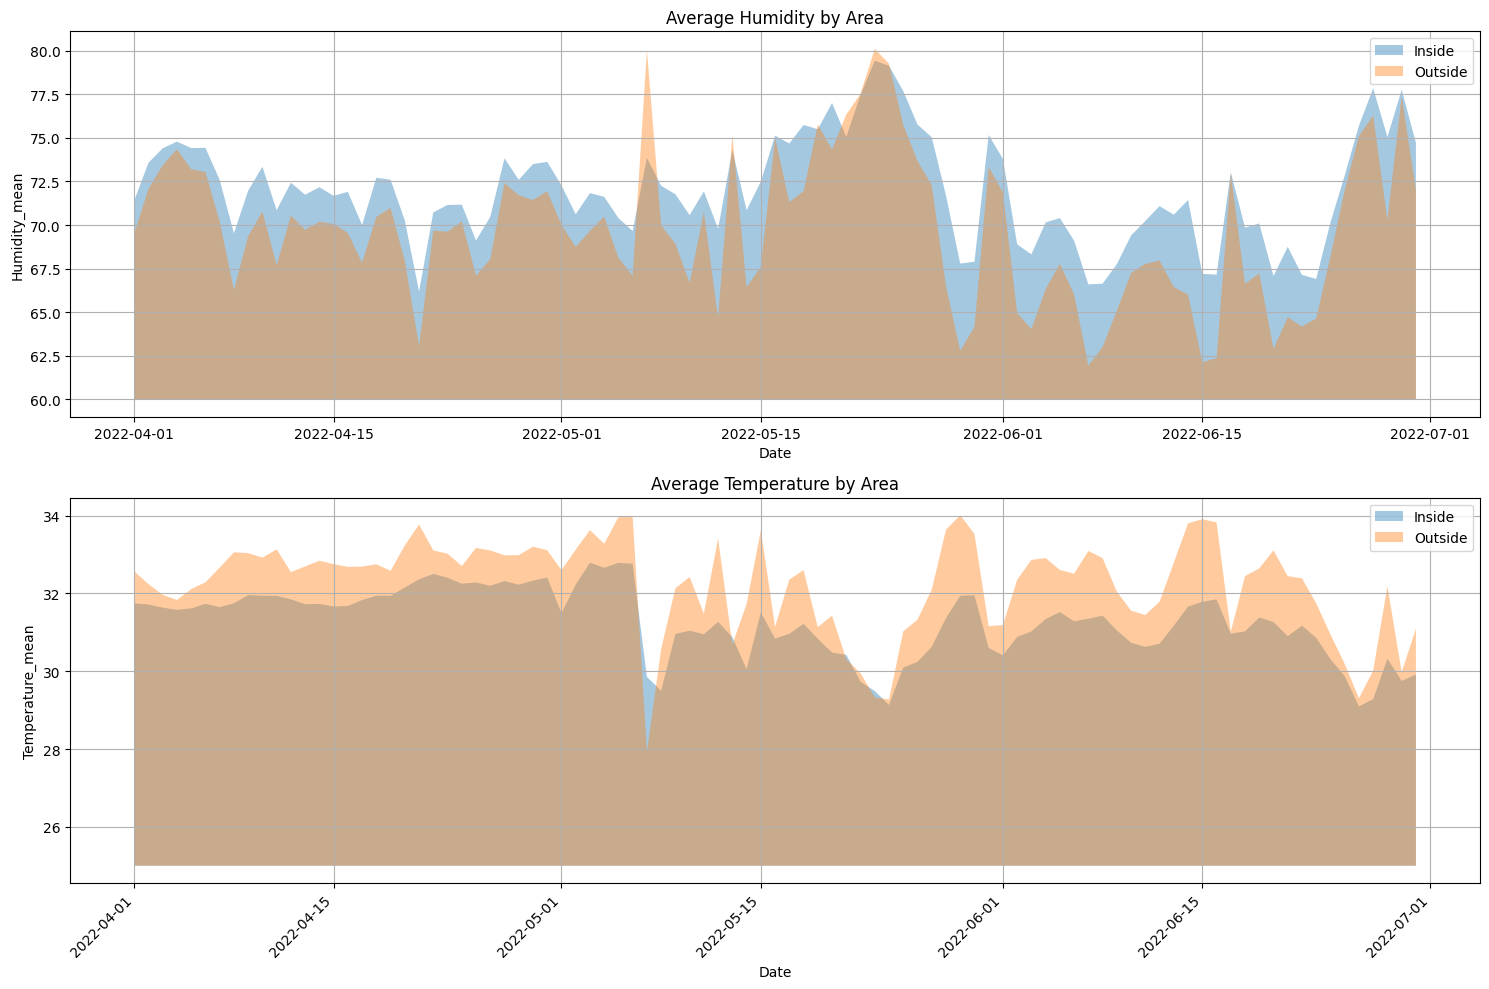

In [19]:
grouped = df_E_F1[df_E_F1['Area'] != 'Dry Room']
grouped = grouped.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.fill_between(area_data['Date'], 60,area_data['Humidity_mean'], label=area, alpha=0.4)  # Adjust alpha for transparency

ax1.set_title('Average Humidity by Area')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity_mean')
ax1.legend()
ax1.grid(True)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.fill_between(area_data['Date'], 25, area_data['Temperature_mean'], label=area, alpha=0.4)  # Adjust alpha for transparency

ax2.set_title('Average Temperature by Area')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature_mean')
ax2.legend()
ax2.grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
#
df_E_F1_Outside = df_E_F1[df_E_W1['Area'] == 'Outside']
df_E_F1_Outside = df_E_F1_Outside[['Datetime', 'Humidity_mean', 'Temperature_mean']].reset_index(drop=True)

# Create dataset for Solar Consumption of Factory 1 (F1)
df_SC_F1 = pd.read_excel(Solar_Consumption_F1)
df_SC_F1 = pd.merge(df_SC_F1, df_E_F1_Outside, on='Datetime', how='outer')
df_SC_F1['Date'] = pd.to_datetime(df_SC_F1['Datetime'].dt.date)
df_SC_F1['Time'] = df_SC_F1['Datetime'].dt.time

df_SC_F1['Plant'] = 'Factory F1'
df_SC_F1['Global Irradiation'] = df_SC_F1.apply(GlobalIrradiation_MissingValue, axis=1)
df_SC_F1['Inverter Yield'] = df_SC_F1.apply(InverterYield_MissingValue, axis=1)
df_SC_F1['Self Consumption'] = df_SC_F1.apply(SelfConsumption_MissingValue, axis=1)
df_SC_F1['Global Irradiation'] = df_SC_F1.groupby('Time')['Global Irradiation'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Inverter Yield'] = df_SC_F1.groupby('Time')['Inverter Yield'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Self Consumption'] = df_SC_F1.groupby('Time')['Self Consumption'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Export Energy'] = df_SC_F1.apply(ExportEnergy_MissingValue, axis=1)
df_SC_F1 = df_SC_F1.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC_F1.info()

<ipython-input-20-82a7a99ad04b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_E_F1_Outside = df_E_F1[df_E_W1['Area'] == 'Outside']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2184 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2184 non-null   float64       
 3   Inverter Yield      2184 non-null   float64       
 4   Export Energy       2184 non-null   float64       
 5   Self Consumption    2184 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


# **Determine On-Peak and Off-Peak Period**

In [23]:
#
Peak_Calendar = pd.read_excel(Peak_Calendar)

#
df_SC = pd.concat([df_SC_W1, df_SC_F1], axis=0)

#
df_SC = pd.merge(df_SC, Peak_Calendar, on='Datetime', how='inner')
df_SC = df_SC.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC.head(10)

,Plant,Datetime,Global Irradiation,Inverter Yield,Export Energy,Self Consumption,Humidity_mean,Temperature_mean,Date,Time,Time_Period
0,Factory F1,2022-04-01 00:00:00,0.000000,0.00,0.0,0.00,72.090909,30.963636,2022-04-01,00:00:00,Off-Peak
1,Factory F1,2022-04-01 01:00:00,0.000000,0.00,0.0,0.00,72.681818,30.863636,2022-04-01,01:00:00,Off-Peak
2,Factory F1,2022-04-01 02:00:00,0.000000,0.00,0.0,0.00,73.666667,30.758333,2022-04-01,02:00:00,Off-Peak
3,Factory F1,2022-04-01 03:00:00,0.000000,0.00,0.0,0.00,74.590909,30.709091,2022-04-01,03:00:00,Off-Peak
4,Factory F1,2022-04-01 04:00:00,0.000000,0.00,0.0,0.00,75.583333,30.641667,2022-04-01,04:00:00,Off-Peak
5,Factory F1,2022-04-01 05:00:00,0.000000,0.00,0.0,0.00,76.125000,30.525000,2022-04-01,05:00:00,Off-Peak
6,Factory F1,2022-04-01 06:00:00,0.023333,4.49,0.0,4.49,76.500000,30.433333,2022-04-01,06:00:00,Off-Peak
7,Factory F1,2022-04-01 07:00:00,0.193611,42.45,0.0,42.45,76.541667,30.533333,2022-04-01,07:00:00,Off-Peak
8,Factory F1,2022-04-01 08:00:00,0.424167,93.19,0.0,93.19,76.416667,30.825000,2022-04-01,08:00:00,Off-Peak
9,Factory F1,2022-04-01 09:00:00,0.654167,134.87,0.0,134.87,75.272727,31.118182,2022-04-01,09:00:00,On-Peak


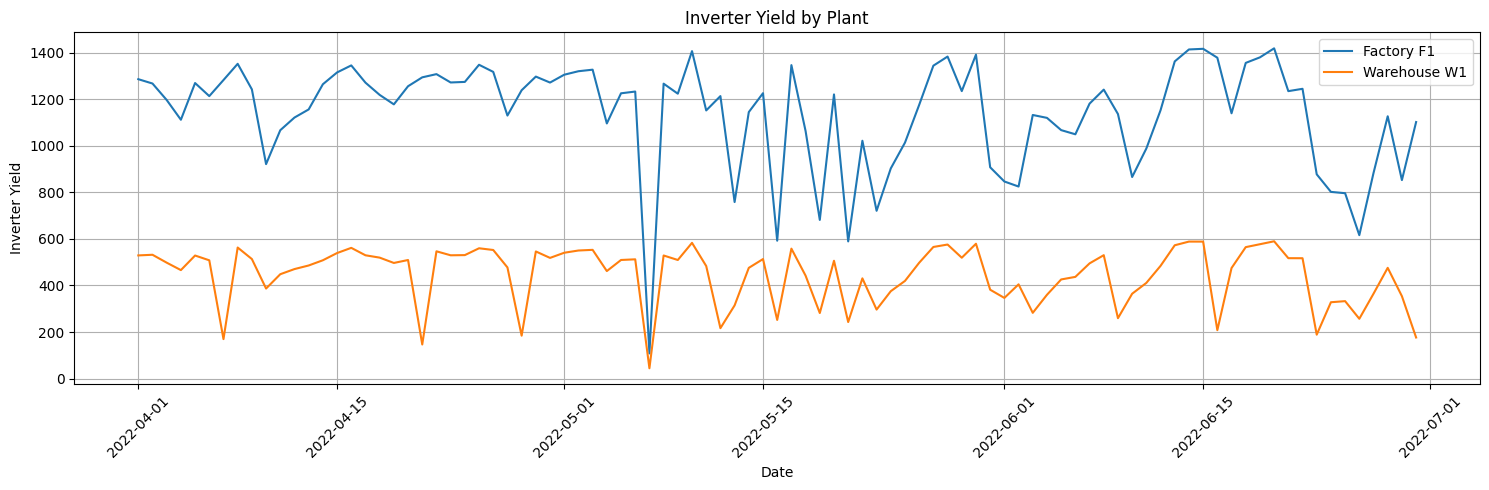

In [24]:
grouped = df_SC.groupby(['Plant', 'Date'])['Inverter Yield'].sum()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Inverter Yield'], label=plant)

plt.title('Inverter Yield by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Inverter Yield')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

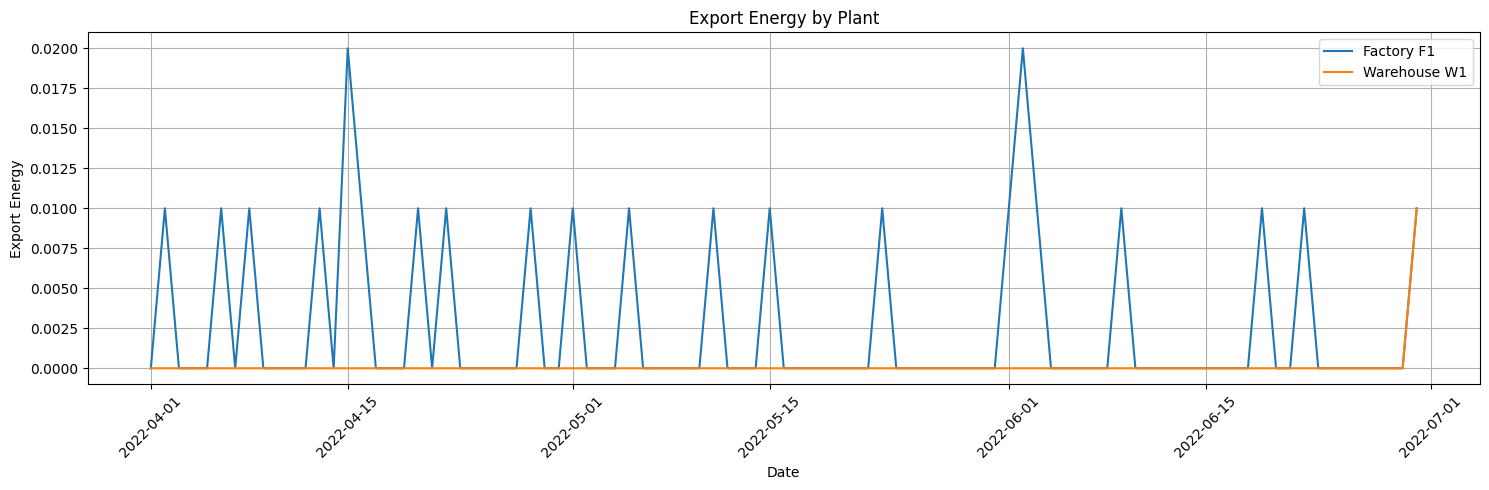

In [25]:
grouped = df_SC.groupby(['Plant', 'Date'])['Export Energy'].sum()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Export Energy'], label=plant)

plt.title('Export Energy by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Export Energy')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()